## SIS and SGS

In [1]:
# Import Packages/Libraries
import geostatspy.GSLIB as GSLIB          # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats    # GSLIB methods convert to Python 
import pandas as pd
import seaborn as sns
import numpy as np                        # set working directory, run executables
import matplotlib.pyplot as plt           # for plotting
from scipy import stats                   # summary statistics
import astropy.convolution.convolve as convolve
import scipy.signal as signal             # kernel for moving window calculation
import math                               # trig etc.

In [2]:
df = pd.read_csv('df_nscored.csv')
df_sand = pd.read_csv('dfsand_nscored.csv')
df_shale = pd.read_csv('dfshale_nscored.csv')

In [3]:
ind_vario = np.load('indicatorvariogram.npy').item()
sandpor_vario = np.load('sandporosityvariogram.npy').item()
shalepor_vario = np.load('shaleporosityvariogram.npy').item()
sandperm_vario = np.load('sandpermeabilityvariogram.npy').item()
shaleperm_vario = np.load('shalepermeabilityvariogram.npy').item()

In [4]:
por_trend = np.load('porositytrend.npy')
perm_trend = np.load('permeabilitytrend.npy')

In [38]:
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=18)
plt.rc('figure', titlesize=18)
plt.rc('legend', fontsize=16)

### SIS

In [6]:
# Sequential Indicator Simulation with Simple Kriging Multiple Realizations 
nx = 100; ny = 100; xsiz = 10.0; ysiz = 10.0; xmn = 5.0; ymn = 5.0; nxdis = 1; nydis = 1
ndmin = 0; ndmax = 10; nodmax = 10; radius = 100; skmean = 0
tmin = -999; tmax = 999
dummy_trend = np.zeros((10,10))            # the current version requires trend input - if wrong size it is ignored 

ncut = 2                                   # number of facies
thresh = [0,1]                             # the facies categories (use consistent order)
gcdf = [0.24,0.76]                         # the global proportions of the categories - from update 4
varios = []                                # the variogram list

varios.append(ind_vario)
varios.append(ind_vario)

In [121]:
# do the SIS
numplots = 10
# loop
sim_ik = np.zeros([numplots,100,100]) # preallocate array to hold simulation results
for i in range(0,numplots):
    sim_ik[i,:,:] = geostats.sisim(df,'X','Y','Facies',ivtype=0,koption=0,ncut=2,thresh=thresh,gcdf=gcdf,trend=dummy_trend,
                    tmin=tmin,tmax=tmax,zmin=0.0,zmax=1.0,ltail=1,ltpar=1,middle=1,mpar=0,utail=1,utpar=2,
                    nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed = i,
                    ndmin=ndmin,ndmax=ndmax,nodmax=nodmax,mults=1,nmult=3,noct=-1,radius=radius,ktype=0,vario=varios)

Data for IK3D: Variable column Facies
  Number   = 217
Setting up rotation matrices for variogram and search
Working on a single realization, seed 0
   currently on node 0
   currently on node 1000
   currently on node 2000
   currently on node 3000
   currently on node 4000
   currently on node 5000
   currently on node 6000
   currently on node 7000
   currently on node 8000
   currently on node 9000
Data for IK3D: Variable column Facies
  Number   = 217
Setting up rotation matrices for variogram and search
Working on a single realization, seed 1
   currently on node 0
   currently on node 1000
   currently on node 2000
   currently on node 3000
   currently on node 4000
   currently on node 5000
   currently on node 6000
   currently on node 7000
   currently on node 8000
   currently on node 9000
Data for IK3D: Variable column Facies
  Number   = 217
Setting up rotation matrices for variogram and search
Working on a single realization, seed 2
   currently on node 0
   currently on 

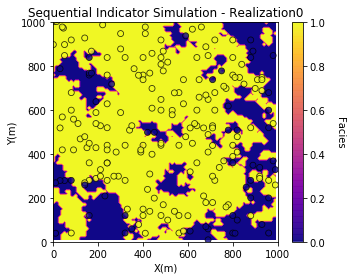

In [8]:
# plot realizations of the SIS
xmin = 0.0; xmax = 1000.0; ymin = 0.0; ymax = 1000.0; cmap = plt.cm.plasma # plotting parameters
# loop
plt.figure(figsize=(5,4*numplots))
for i in range(0,numplots):
    plt.subplot(numplots,1,i+1)
    GSLIB.locpix_st(sim_ik[i,:,:],xmin,xmax,ymin,ymax,xsiz,0.0,1.0,df,'X','Y','Facies','Sequential Indicator Simulation - Realization' + str(i),'X(m)','Y(m)','Facies',cmap)

plt.tight_layout()
plt.show()

## SGS

### SGS of Shale Porosity

In [122]:
# do simple kriging several times - not displayed but run for histograms, cdf and variogram checking
num_sim = 10
shaleporsim = np.zeros([num_sim,nx,ny]) # preallocate array

# random seed is the value of i ... not terrible inventive but ensures different simulations
for i in range(0,num_sim):
    shaleporsim[i,:,:] = geostats.sgsim(df_shale,'X','Y','Por_Res',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,
                                itrans=1,ismooth=0,dftrans=0,tcol=0,
                                twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
                                nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=i,
                                ndmin=ndmin,ndmax=ndmax,nodmax=10,mults=0,nmult=2,noct=-1,
                                radius=radius,radius1=1,sang1=0,
                                mxctx=10,mxcty=10,ktype=0,colocorr=0.0,sec_map=0,vario=shalepor_vario)



 Data for SGSIM: Number of acceptable data     = 53
                 Number trimmed                = 0
                 Weighted Average              = -0.0135
                 Weighted Variance             = 0.0005
                 Weighted Transformed Average  = 0.0012
                 Weighted Transformed Variance = 0.9745
Setting up rotation matrices for variogram and search
Working on realization number 0
   currently on node 0
   currently on node 1000
   currently on node 2000
   currently on node 3000
   currently on node 4000
   currently on node 5000
   currently on node 6000
   currently on node 7000
   currently on node 8000
   currently on node 9000
Reassigning data to nodes

 Realization 0: number   = 10000
                                   mean     = 0.0347 (close to 0.0?)
                                   variance = 0.9473 (close to gammabar(V,V)? approx. 1.0)

 Data for SGSIM: Number of acceptable data     = 53
                 Number trimmed                = 0
    

   currently on node 1000
   currently on node 2000
   currently on node 3000
   currently on node 4000
   currently on node 5000
   currently on node 6000
   currently on node 7000
   currently on node 8000
   currently on node 9000
Reassigning data to nodes

 Realization 0: number   = 10000
                                   mean     = -0.0344 (close to 0.0?)
                                   variance = 0.8943 (close to gammabar(V,V)? approx. 1.0)


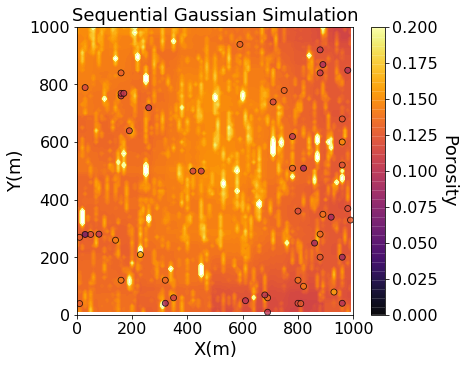

In [39]:
# plot simulated results
xmin = 0.0; xmax = 1000.0; ymin = 0.0; ymax = 1000.0; cmap = plt.cm.inferno

plt.figure()
GSLIB.locpix_st(shaleporsim[0,:,:]+por_trend,xmin,xmax,ymin,ymax,xsiz,0.00,0.20,df_shale,'X','Y','Porosity',
                'Sequential Gaussian Simulation','X(m)','Y(m)','Porosity',cmap)
plt.subplots_adjust(left=0.0, bottom=0.0, right=0.8, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

### SGS of Shale Permeability

In [123]:
# do simple kriging several times - not displayed but run for histograms, cdf and variogram checking
num_sim = 10
shalepermsim = np.zeros([num_sim,nx,ny]) # preallocate array

# random seed is the value of i ... not terrible inventive but ensures different simulations
for i in range(0,num_sim):
    shalepermsim[i,:,:] = geostats.sgsim(df_shale,'X','Y','Perm_Res',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,
                                itrans=1,ismooth=0,dftrans=0,tcol=0,
                                twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
                                nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=i,
                                ndmin=ndmin,ndmax=ndmax,nodmax=10,mults=0,nmult=2,noct=-1,
                                radius=radius,radius1=1,sang1=0,
                                mxctx=10,mxcty=10,ktype=0,colocorr=0.0,sec_map=0,vario=shaleperm_vario)



 Data for SGSIM: Number of acceptable data     = 53
                 Number trimmed                = 0
                 Weighted Average              = -8.7431
                 Weighted Variance             = 57.7455
                 Weighted Transformed Average  = 0.0021
                 Weighted Transformed Variance = 0.9707
Setting up rotation matrices for variogram and search
Working on realization number 0
   currently on node 0
   currently on node 1000
   currently on node 2000
   currently on node 3000
   currently on node 4000
   currently on node 5000
   currently on node 6000
   currently on node 7000
   currently on node 8000
   currently on node 9000
Reassigning data to nodes

 Realization 0: number   = 10000
                                   mean     = -0.0227 (close to 0.0?)
                                   variance = 1.0328 (close to gammabar(V,V)? approx. 1.0)

 Data for SGSIM: Number of acceptable data     = 53
                 Number trimmed                = 0
  

   currently on node 1000
   currently on node 2000
   currently on node 3000
   currently on node 4000
   currently on node 5000
   currently on node 6000
   currently on node 7000
   currently on node 8000
   currently on node 9000
Reassigning data to nodes

 Realization 0: number   = 10000
                                   mean     = -0.2188 (close to 0.0?)
                                   variance = 0.7392 (close to gammabar(V,V)? approx. 1.0)


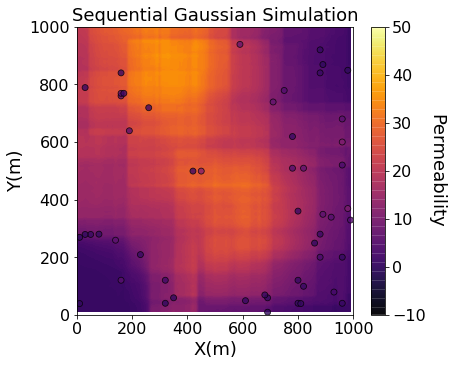

In [40]:
# plot simulated results
xmin = 0.0; xmax = 1000.0; ymin = 0.0; ymax = 1000.0; cmap = plt.cm.inferno

plt.figure()
GSLIB.locpix_st(shalepermsim[0,:,:]+perm_trend,xmin,xmax,ymin,ymax,xsiz,-10.0,50.0,df_shale,'X','Y','Perm',
                'Sequential Gaussian Simulation','X(m)','Y(m)','Permeability',cmap)
plt.subplots_adjust(left=0.0, bottom=0.0, right=0.8, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

### SGS of Sandstone Porosity

In [125]:
# do simple kriging several times - not displayed but run for histograms, cdf and variogram checking
num_sim = 10
sandporsim = np.zeros([num_sim,nx,ny]) # preallocate array

# random seed is the value of i ... not terrible inventive but ensures different simulations
for i in range(0,num_sim):
    sandporsim[i,:,:] = geostats.sgsim(df_sand,'X','Y','Por_Res',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,
                                itrans=1,ismooth=0,dftrans=0,tcol=0,
                                twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
                                nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=i,
                                ndmin=ndmin,ndmax=ndmax,nodmax=10,mults=0,nmult=2,noct=-1,
                                radius=radius,radius1=1,sang1=0,
                                mxctx=10,mxcty=10,ktype=0,colocorr=0.0,sec_map=0,vario=sandpor_vario)



 Data for SGSIM: Number of acceptable data     = 164
                 Number trimmed                = 0
                 Weighted Average              = 0.0048
                 Weighted Variance             = 0.0004
                 Weighted Transformed Average  = 0.0007
                 Weighted Transformed Variance = 0.9946
Setting up rotation matrices for variogram and search
Working on realization number 0
   currently on node 0
   currently on node 1000
   currently on node 2000
   currently on node 3000
   currently on node 4000
   currently on node 5000
   currently on node 6000
   currently on node 7000
   currently on node 8000
   currently on node 9000
Reassigning data to nodes

 Realization 0: number   = 10000
                                   mean     = 0.045 (close to 0.0?)
                                   variance = 0.9655 (close to gammabar(V,V)? approx. 1.0)

 Data for SGSIM: Number of acceptable data     = 164
                 Number trimmed                = 0
    

   currently on node 1000
   currently on node 2000
   currently on node 3000
   currently on node 4000
   currently on node 5000
   currently on node 6000
   currently on node 7000
   currently on node 8000
   currently on node 9000
Reassigning data to nodes

 Realization 0: number   = 10000
                                   mean     = -0.0404 (close to 0.0?)
                                   variance = 0.9956 (close to gammabar(V,V)? approx. 1.0)


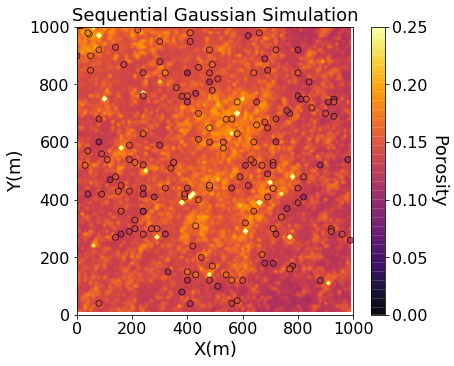

In [41]:
# plot simulated results
xmin = 0.0; xmax = 1000.0; ymin = 0.0; ymax = 1000.0; cmap = plt.cm.inferno

plt.figure()
GSLIB.locpix_st(sandporsim[0,:,:]+por_trend,xmin,xmax,ymin,ymax,xsiz,0.00,0.25,df_sand,'X','Y','Porosity',
                'Sequential Gaussian Simulation','X(m)','Y(m)','Porosity',cmap)
plt.subplots_adjust(left=0.0, bottom=0.0, right=0.8, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

### SGS of Sandstone Permeability

In [124]:
# do simple kriging several times - not displayed but run for histograms, cdf and variogram checking
num_sim = 10
sandpermsim = np.zeros([num_sim,nx,ny]) # preallocate array

# random seed is the value of i ... not terrible inventive but ensures different simulations
for i in range(0,num_sim):
    sandpermsim[i,:,:] = geostats.sgsim(df_sand,'X','Y','Perm_Res',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,
                                itrans=1,ismooth=0,dftrans=0,tcol=0,
                                twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
                                nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=i,
                                ndmin=ndmin,ndmax=ndmax,nodmax=10,mults=0,nmult=2,noct=-1,
                                radius=radius,radius1=1,sang1=0,
                                mxctx=10,mxcty=10,ktype=0,colocorr=0.0,sec_map=0,vario=sandperm_vario)



 Data for SGSIM: Number of acceptable data     = 164
                 Number trimmed                = 0
                 Weighted Average              = 4.1685
                 Weighted Variance             = 1069.0895
                 Weighted Transformed Average  = 0.0006
                 Weighted Transformed Variance = 0.9937
Setting up rotation matrices for variogram and search
Working on realization number 0
   currently on node 0
   currently on node 1000
   currently on node 2000
   currently on node 3000
   currently on node 4000
   currently on node 5000
   currently on node 6000
   currently on node 7000
   currently on node 8000
   currently on node 9000
Reassigning data to nodes

 Realization 0: number   = 10000
                                   mean     = 0.0186 (close to 0.0?)
                                   variance = 0.9213 (close to gammabar(V,V)? approx. 1.0)

 Data for SGSIM: Number of acceptable data     = 164
                 Number trimmed                = 0


   currently on node 1000
   currently on node 2000
   currently on node 3000
   currently on node 4000
   currently on node 5000
   currently on node 6000
   currently on node 7000
   currently on node 8000
   currently on node 9000
Reassigning data to nodes

 Realization 0: number   = 10000
                                   mean     = -0.0187 (close to 0.0?)
                                   variance = 0.9176 (close to gammabar(V,V)? approx. 1.0)


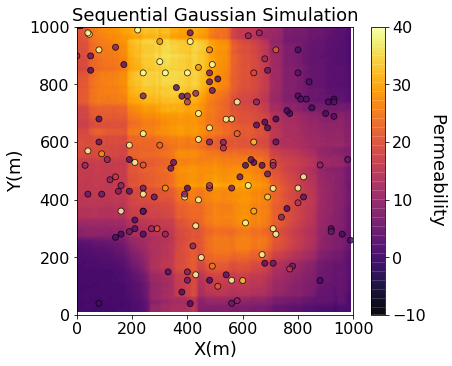

In [55]:
# plot simulated results
xmin = 0.0; xmax = 1000.0; ymin = 0.0; ymax = 1000.0; cmap = plt.cm.inferno

plt.figure()
GSLIB.locpix_st(sandpermsim[0,:,:]+perm_trend,xmin,xmax,ymin,ymax,xsiz,-10.00,40.00,df_sand,'X','Y','Perm',
                'Sequential Gaussian Simulation','X(m)','Y(m)','Permeability',cmap)
plt.subplots_adjust(left=0.0, bottom=0.0, right=0.8, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

### Cosimulation for Permeability

In [110]:
# cosimulation using porosity simulation
trend = np.zeros((ny,nx)) # no known trend to add. have porosity trend already added back into porosity sim

num_sim = 10
sandsim_perm = np.zeros([num_sim,nx,ny]) # preallocate array

# correlation between well data for porosity and permeability
porperm_corr = df_sand['Porosity'].corr(df_sand['Perm'])

df_sand['logPerm'] = np.log(df_sand['Perm'].values) # set up logPerm data

for i in range(0,num_sim):
    sandsim_perm[i,:,:] = geostats.sgsim(df_sand,'X','Y','Perm',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,
                          itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=1000.0,ltail=1,ltpar=0.0,utail=1,utpar=1000.0,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=i,
            ndmin=ndmin,ndmax=ndmax,nodmax=10,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=4,colocorr=porperm_corr,sec_map=sandporsim[i,:,:],vario=sandperm_vario)


 Data for SGSIM: Number of acceptable data     = 164
                 Number trimmed                = 0
                 Weighted Average              = 23.033
                 Weighted Variance             = 1208.3562
                 Weighted Transformed Average  = 0.0007
                 Weighted Transformed Variance = 0.9939
 Secondary Data: Number of data             = 10000
                 Equal Weighted Average     = 0.0112
                 Equal Weighted Variance    = 0.0003
 Transforming Secondary Data with
 variance reduction of 1.0
Setting up rotation matrices for variogram and search
Working on realization number 0
   currently on node 0
   currently on node 1000
   currently on node 2000
   currently on node 3000
   currently on node 4000
   currently on node 5000
   currently on node 6000
   currently on node 7000
   currently on node 8000
   currently on node 9000
Reassigning data to nodes

 Realization 0: number   = 10000
                                   mean     = 

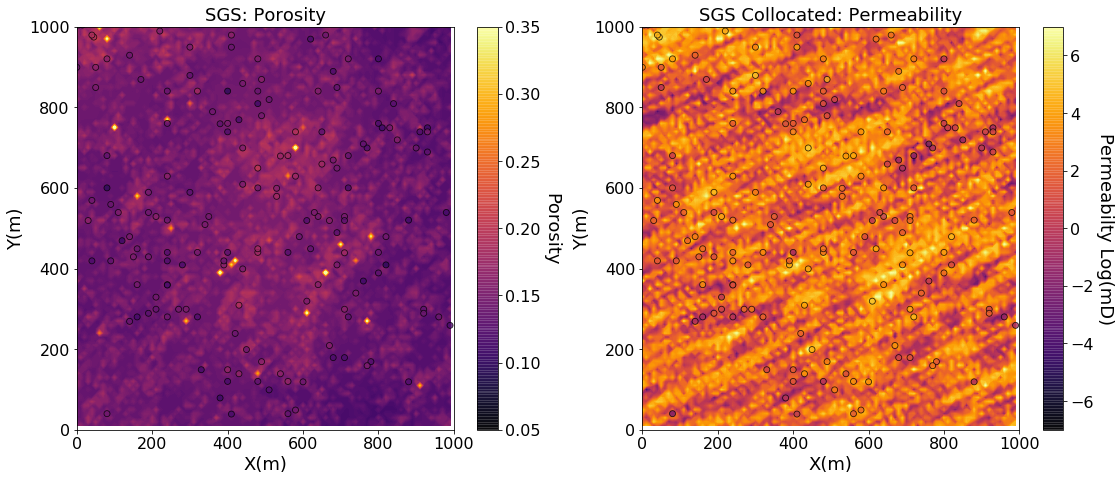

In [120]:
# plotting cosimulated data
xmin = 0.0; xmax = 1000.0; ymin = 0.0; ymax = 1000.0; cmap = plt.cm.inferno
plt.subplot(121)
GSLIB.locpix_st(sandporsim[0,:,:]+por_trend,xmin,xmax,ymin,ymax,xsiz,0.05,0.35,
                df_sand,'X','Y','Porosity','SGS: Porosity','X(m)','Y(m)','Porosity',cmap)
sandsim_logperm = np.log(sandsim_perm.clip(0.0001,1200))
plt.subplot(122)
GSLIB.locpix_st(sandsim_logperm[0,:,:],xmin,xmax,ymin,ymax,xsiz,-7.0,7.0,
                df_sand,'X','Y','logPerm','SGS Collocated: Permeability','X(m)','Y(m)','Permeabilty Log(mD)',cmap)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.4, top=1.4, wspace=0.2, hspace=0.2)
plt.show()

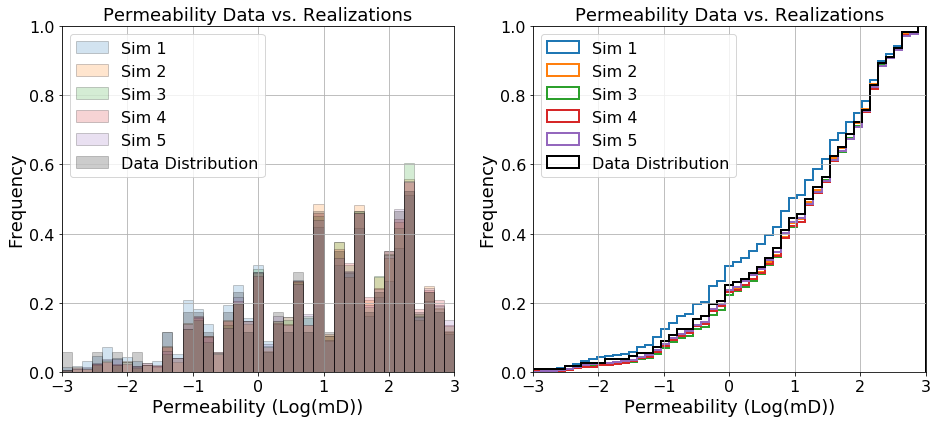

<Figure size 432x288 with 0 Axes>

In [117]:
# check simulated histogram and cdf with original data
plt.subplot(121)
for i in range(0,num_sim):
    plt.hist(sandsim_logperm[i,:,:].flatten(),bins=np.linspace(-3,3,40),alpha=0.2,density=True,
         edgecolor='black',label = ('Sim ' + str(i+1)))

plt.hist(df_sand['logPerm'].values, facecolor='black',bins=np.linspace(-3,3,40),alpha=0.2,
         density=True,edgecolor='black',label = 'Data Distribution')
plt.xlim([-3,3]); plt.ylim([0,1.0])
plt.xlabel('Permeability (Log(mD))'); plt.ylabel('Frequency'); plt.title('Permeability Data vs. Realizations')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(122)
for i in range(0,num_sim):
    plt.hist(sandsim_logperm[i,:,:].flatten(),lw = 2, bins=np.linspace(-3,3,50),histtype="step",alpha=1.0,
         density=True,cumulative=True,label=('Sim ' + str(i+1)))
    
plt.hist(df_sand['logPerm'].values, color='black',lw = 2,bins=np.linspace(-3,3,50),
         histtype="step",alpha=1.0,density=True,cumulative=True,edgecolor='black',label='Data Distribution')
plt.xlim([-3,3]); plt.ylim([0,1.0])
plt.xlabel('Permeability (Log(mD))'); plt.ylabel('Frequency'); plt.title('Permeability Data vs. Realizations')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3)
plt.show()

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3)
plt.show()